# CS 3654 Team Project

### Team Info:  
Project Title:  Correlations on Climate Change  
Team name:  Greenhouse Guys  
Team member names and PIDs: Atharva Haldankar (ahaldankar), Fairuz Ahmed (ahfairuz), Andrew Ahn (aandrew17), Jonathan Jwa (jonathanyjwa23), Justin Perez (justinmp)

### Project Introduction:

**Initial Description:** We plan to analyze climate data based on country to understand which countries are responsible for the majority of greenhouse gas emissions, what the characteristics of those countries are, and what negative effects greenhouse emissions have on people and the environment.

**Potential research questions:**  
    1. Which countries produce the most greenhouse gases? Which countries produce the least?  
    2. Is there a correlation between GDP and greenhouse gas emissions?  
    3. Does a country's use of renewable energy decrease their emissions?  
    4. Does a country's population or land area have anything to do with greenhouse emissions?  
    5. What forms of government do the countries that produce the most greenhouse gases have?  
    6. Do greenhouse emissions come primarily from urban or rural settings?  
    7. Which countries are affected most by greenhouse emissions?  
    8. Do emissions impact human life expectancy?  
    
**Potential source data:**
1. https://www.kaggle.com/datasets/sudalairajkumar/undata-country-profiles
2. https://worldpopulationreview.com/country-rankings/greenhouse-gas-emissions-by-country
3. https://www.kaggle.com/saurabhshahane/green-house-gas-historical-emission-data  
4. https://www.kaggle.com/brendan45774/countries-life-expectancy

### Individual Contributions: 
QAC on Population/Land Area vs. Greenhouse Emissions: Atharva  
QAC on GDP vs. Greenhouse Emissions: Justin

### Procedural Notes
- When analyzing population vs. CO2 emissions, we tried fitting a logarithmic model to the data, due to how the data was structured. However, since this model had a lower R-value than the linear model, we decided not to include those results. 
- For population vs. CO2 emissions, we also tried fitting a polynomial model. However, despite specifying the model as a polynomial of degree 2, we still got a linear fit, since the model computed an x^2 coefficient of 0. 
- For our initial questions, we used the CO2 emission estimates column from the country profiles kaggle dataset (link 1). However, since emissions data from the world population review site (link 2) is slightly more up to date, we used this source for some of the later questions. 

## Question: Does a Country's Population or Land Area have anything to do with greenhouse emissions? (Atharva)

Does population or land area affect the volume of greenhouse emissions? By determining a correlation between these variables, we can better determine which countries are major contributors of greenhouse emissions. For example, if population and greenhouse emissions are strongly correlated together, then we can focus on countries with large populations, since those nations will have the greatest influence over the volume of emissions. Furthermore, we'll get a better sense geographically for which countries are major contributors of emissions. 

In order to answer this question, data from https://www.kaggle.com/datasets/sudalairajkumar/undata-country-profiles will be utilized. This data contains general information about each of the countries as well as social, economic, and environmental indicators. The dataset was extracted from information published by the United Nations, so it is a good authoritative source. 

Before analyzing the data, it will be helpful to define what units population, land area, and greenhouse emissions are measured in. Population will be measured in thousands of people, land area will be measured in square kilometers, and greenhouse emissions will be quantified in million tons / tons per capita. 

## Analysis: 
First we import some libraries that we will need. Matplotlib helps with plotting and visualization, and the sklearn.linear_model module will allow a linear regression model to fit a line to the given data. 

In [ ]:
import pandas
import numpy
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Read in the original country profile data

In [ ]:
# Read the original data into a pandas dataframe. 
dirty = pandas.read_csv("country_profile_variables.csv")

Here's a glance at the data:   

In [ ]:
dirty.head()

These are the data types. Notice how the Surface area (km2) column has an object data type. We should probably clean this column so the data is in a more useful form. 

In [ ]:
dirty.dtypes

Before doing any further analysis, we retain a copy of the original data. This way, we can track any modifications we choose to make. 

In [ ]:
# Make a copy of the original dataframe and process data for analysis
clean = dirty.copy()

Clean the data by taking out the ~ symbol  
Note: For computation purposes, we will treat countries that have a really small land area (~0) as having no land area, even though this is clearly not the case. 

In [ ]:
clean['Surface area (km2)'] = dirty['Surface area (km2)'].map(lambda val: int(val.replace('~', '')))

Some countries have a land area < 0 or emission estimates that are < 0. 

In [ ]:
# TODO: Maybe interpolate or replace the country surface area with data pulled from other sources
clean[clean['Surface area (km2)'] < 0]

In [ ]:
# Remove countries that meet this criteria. 
clean[clean['CO2 emission estimates (million tons/tons per capita)'] < 0]

We will filter out rows that have a negative Surface area (km2) or negative CO2 emission estimates.  
The UN likely didn't have accurate data on those countries

In [ ]:
nonNegSA = clean[clean['Surface area (km2)'] >= 0]
filtClean = nonNegSA[nonNegSA['CO2 emission estimates (million tons/tons per capita)'] >= 0]

Sanity check: We would expect that 20 rows are filtered based on the emission estimates column and 3 rows are filtered out based on surface area. That gives 229 rows - 23 rows = 206 rows. 

In [ ]:
filtClean.shape

In [ ]:
filtClean.head()

Now that the data is thoroughly cleaned, we can begin visualization and analysis.  
We first create scatterplots for both Surface Area vs. CO2 emissions and Population (thousands) vs. CO2 emissions

In [ ]:
filtClean.plot.scatter(x='Surface area (km2)', y='CO2 emission estimates (million tons/tons per capita)', figsize=(10,5))
filtClean.plot.scatter(x='Population in thousands (2017)', y='CO2 emission estimates (million tons/tons per capita)', color='green', figsize=(10,5))

Then, we compute the Pearson correlation coefficients for Surface Area vs. CO2 emissions and for Population (thousands) vs. CO2.  

In [ ]:
filtClean['Surface area (km2)'].corr(filtClean['CO2 emission estimates (million tons/tons per capita)'])

In [ ]:
filtClean['Population in thousands (2017)'].corr(filtClean['CO2 emission estimates (million tons/tons per capita)'])

These R values are both near or in the 0.70-0.80 range, so they indicate a relatively good linear fit.  
Let's go ahead and create a linear regression model for both pairs of x,y data. 

In [ ]:
# Fit the Surface Area vs. CO2 emissions data to a linear regression model. 
lmSA = LinearRegression().fit(filtClean[['Surface area (km2)']], filtClean[['CO2 emission estimates (million tons/tons per capita)']])
lmSA.coef_, lmSA.intercept_

In [ ]:
# Fit the Population (thousands) vs. CO2 emissions data to a linear regression model. 
lmPop = LinearRegression().fit(filtClean[['Population in thousands (2017)']], filtClean[['CO2 emission estimates (million tons/tons per capita)']])
lmPop.coef_, lmPop.intercept_

Create a new data table which has a column for predicted CO2 levels with the SA vs. CO2 data

In [ ]:
# Used assign() to create a new DataFrame with the Predicted_CO2 column because of the 
# SettingWithCopy warning. 

# Create a predictedCO2 column for Surface Area
predictedCO2 = filtClean['Surface area (km2)']*lmSA.coef_[0] + lmSA.intercept_
filtCleanSA = filtClean.assign(Predicted_CO2 = predictedCO2)
filtCleanSA

Do the same, except for the Pop. (thousands) vs. CO2 data

In [ ]:
# Create a predictedCO2 column for Population
predictedCO2 = filtClean['Population in thousands (2017)']*lmPop.coef_[0] + lmPop.intercept_
filtCleanPop = filtClean.assign(Predicted_CO2 = predictedCO2)
filtCleanPop

Visualize the results.  
Overlay the actual data with the predicted data for both x,y pairs. 

In [ ]:
# Overlay the predicted CO2 levels on the plot with actual Surface Area vs. CO2 data. 
axSA = filtCleanSA.plot.scatter(x='Surface area (km2)', y='CO2 emission estimates (million tons/tons per capita)', figsize=(10,5))
filtCleanSA.plot.scatter(x='Surface area (km2)', y='Predicted_CO2', ax=axSA, color='red')

In [ ]:
# Visualization Population (thousands) vs. CO2 data
axPop = filtCleanPop.plot.scatter(x='Population in thousands (2017)', y='CO2 emission estimates (million tons/tons per capita)', color='green', figsize=(10,5))
filtCleanPop.plot.scatter(x='Population in thousands (2017)', y='Predicted_CO2', ax=axPop, color='red')

Make sure the regression models are consistent with what we would expect. 

In [ ]:
# Checkpoint: Verify the predicted columns are correct. 
filtCleanSA['Surface area (km2)'].corr(filtCleanSA['Predicted_CO2']), filtCleanPop['Population in thousands (2017)'].corr(filtCleanPop['Predicted_CO2'])

## Conclusion:

From the above analysis, it appears that land area and population do have some relation to CO2 emissions. In both cases, there is a positive correlation with a small slope. As surface area increases by 1 km^2, the model predicts an increase of 4.33*10^-3 millions of tons of CO2 / tons per capita. Similarly, as population increases by a thousand people, the model indicates that there should be about an increase of 0.052 millions of tons of CO2 / tons per capita. According to the linear regression model, countries which have a larger surface area on average produce more CO2 emissions. Likewise, countries which have a greater population on average produce more CO2 than countries with smaller populations. 

However, the models above are only approximations and leave out important information. From the graph of Surface Area (km2) vs. CO2 emissions, we can see a few countries which emit a substantially larger volume of CO2 than other nations. These countries also lie above the regression line for both plots, which means they emit more CO2 than the models predicted. 

One additional question that can be explored is whether population density is a better predictor of CO2 emissions than total population. A large population density value could be associated with urban areas and cities, and may therefore have a strong correlation with CO2 emissions. Another potential question to consider is whether CO2 emissions can be better predicted using both surface area and population as independent variables. This would require a multiple linear regression analysis. Finally, while the CO2 emissions from this dataset are normalized by population (e.g. divided by tons per capita), it may be worth considering what effect population and surface area have on raw CO2 emissions, for example in units of cubic meters. 

## Question: Is there a correlation between GDP and greenhouse gas emissions? (Justin)

Does GDP affect the volume of greenhouse emissions? By determining a correlation between these variables, we can better determine which countries are major contributors of greenhouse emissions.

In order to answer this question, data from https://www.kaggle.com/datasets/sudalairajkumar/undata-country-profiles will be utilized. This data contains general information about each of the countries as well as social, economic, and environmental indicators. The dataset was extracted from information published by the United Nations, so it is a good authoritative source. 

Before analyzing the data, it will be helpful to define what units GDP, and greenhouse emissions are measured in. GDP will be measured in GDP per capita, in USD. CO2 emissions will be quantified in million tons / tons per capita.

## Analysis: 
We'll use numpy, pandas, and matplotlib to analyze the data. We'll also use the sklearn.linear_model module to fit a linear regression model if there is a correlation.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy

We'll start by reading in our data.

In [ ]:
dirty = pd.read_csv("country_profile_variables.csv")

Preview the data to see what the data looks like and the data types.

In [ ]:
dirty.head()

Lets extract the GDP and CO2 emissions data from the original dataset, into one clean dataframe.

In [ ]:
clean = pd.DataFrame()

# copy 'GDP per capita (current US$)' and ''CO2 emission estimates (million tons/tons per capita)'
clean['Country'] = dirty['country']
clean['Region'] = dirty['Region']
clean['CO2 emission estimates (million tons/tons per capita)'] = dirty['CO2 emission estimates (million tons/tons per capita)']
clean['GDP per capita (current US$)'] = dirty['GDP per capita (current US$)']
clean.head()

There seems to be a lot of missing data in the both columns, here labeled with -99. We'll remove all rows with missing data.

In [ ]:
# remove rows with values less than 0
clean = clean[clean['CO2 emission estimates (million tons/tons per capita)'] >= 0]
clean = clean[clean['GDP per capita (current US$)'] >= 0]
clean.head()

We removed some rows. Lets count the number of missing rows.

In [ ]:
dirty.shape[0] - clean.shape[0]

Lets plot the data.

In [ ]:
# plot CO2 emission estimates vs. GDP per capita
clean.plot.scatter(x='CO2 emission estimates (million tons/tons per capita)', y='GDP per capita (current US$)', figsize=(10,5))

This plot is not too helpful, there seems to be a lot of crowded points close to zero. Lets zoom in closer to zero to get a better understanding of the plot.

In [ ]:
# plot, limit x to 15000
clean.plot.scatter(x='CO2 emission estimates (million tons/tons per capita)', y='GDP per capita (current US$)', figsize=(10,5), xlim=(-500,15000))

To the eye, there does not seem to be a correlation. Lets compute pearson's coeffecient.

In [ ]:
# compute r
clean['CO2 emission estimates (million tons/tons per capita)'].corr(clean['GDP per capita (current US$)'])

## Conclusion:

There is no correlation between GDP and CO2 emissions. This could be because GDP is not a good predictor of CO2 emissions, or because the data is not representative of the real world.

If our result is true, it could mean that CO2 emissions do not have any relationship with GDP. This could mean that countries with lots of exports do not have high CO2 emissions, and that they might rely on other countries for energy and other needs which produce CO2.

This hypothesis could be true due to the amount of outliers we see on our plot. Most countires have low CO2 emissions with an exception of a few countries with very high CO2 emissions.

## Question: What forms of government do the countries that produce the most greenhouse gases have? (Atharva)
What forms of government do nations which are major emitters of greenhouse gases have? By answering this question, we may be able to gain insight into whether certain forms of government are more effective than others in terms of reducing emissions. 

Data for this question will be taken taken from https://cddrl.fsi.stanford.edu/research/autocracies_of_the_world_dataset and https://worldpopulationreview.com/country-rankings/greenhouse-gas-emissions-by-country. 

The Stanford Center on Democracy, Development, and the Rule of Law is responsible for producing the first dataset. This dataset includes information on countries and their forms of government through the years 1950-2012. While this data might seem to be somewhat outdated, only data from 2012 will be analyzed. Furthermore, most governments throughout the world have remained stable for at least the last 10 years, so we expect the data to be accurate. In this dataset, government types are grouped into 5 categories: Democracy, Military, Monarchy, Multiparty, and Single Party. 

The second link lists out countries and their CO2 emissions in millions of tons. The world population review site was responsible for collecting this data, and we expect it to be both accurate and reliable. The data is also current, since it was taken in 2022. 

## Analysis: 
First, let's import both datasets and get a sense of what the data looks like. 

In [ ]:
dirtyGovt = pd.read_excel("countries_by_govt.xls")
dirtyEmissions = pd.read_csv("emissions_Mt_country_2022.csv")

In [ ]:
dirtyGovt.head()

In [ ]:
dirtyEmissions.head()

Here we display the shape of the data as well as the data types present. 

In [ ]:
dirtyGovt.shape
dirtyGovt.dtypes

In [ ]:
dirtyEmissions.shape
dirtyEmissions.dtypes

First, let's make a copy of the DataFrames. This will allow us to refer back to the original data if necessary. 

In [ ]:
# Make a copy of the original dataframe and process data for analysis
newEmissions = dirtyEmissions.copy()
newGovt = dirtyGovt.copy()

Let's filter out all rows in processedGovt which have years other than 2012. 

In [ ]:
# Filter by year (only 2012)
newGovt2012 = newGovt[newGovt.year == 2012]
newGovt2012

Are there any missing or negative values for the columns we're interested in? 

In [ ]:
len(newEmissions[newEmissions.totalCO2emission < 0])
newGovt2012.country.isnull().values.any()
newGovt2012.regime_nr.isnull().values.any()

It looks like we are ok to proceed with visualization and analysis. The data types seem to be consistent, and there are no missing or outlier values in the columns we care about.  
First, let's join the relevant columns from both of these tables together. 

In [ ]:
# First make sure the primary key columns are consistent for both tables. 
countryUpper = [c.upper() for c in newGovt2012.country]
len(countryUpper)
govt2012 = newGovt2012.assign(country_upper = countryUpper)


In [ ]:
govt2012.head(10)
govt2012.shape

In [ ]:
# Now, join by country name. 
joinedData = pandas.merge(govt2012, newEmissions, how='inner', left_on='country_upper', right_on='country')
joinedData.shape

An inner join was used in order to ensure that no values will be NaN in the newly formed table. Now that we've joined, we can filter out the columns which aren't relevant. 

In [ ]:
joinedData = joinedData[['country_x', 'regime_nr', 'totalCO2emission']]
joinedData.shape
joinedData.head()

It looks like we haven't lost any rows, so all the data from the joined table for each of these columns should be present.  
Let's now do a groupby on government type. 

In [ ]:
g = joinedData.groupby('regime_nr')
g.size()

The next step is to aggregate data for the groupby object we have generated. Let's first try taking the mean of the CO2 emissions for each of these columns. 

In [ ]:
g.totalCO2emission.mean()

It looks like countries which have a single party government have a large mean of CO2 emissions. Perhaps this is because there are outlier countries, like China. Let's take the median, which is less prone to outliers, and see if our results differ. 

In [ ]:
g.totalCO2emission.median()

In [ ]:
joinedData[joinedData.regime_nr == 'Monarchy']
joinedData[joinedData.country_x == 'Iran']

Median results give more insight into what may be going on. Democracies, Monarchies, and Single Party states appear to emit more CO2 emissions than nations which have military governments or multiparty systems. However, based on the differences between the mean and median, Single Party states and Democracies contain a few outlier countries which emit a lot more CO2 than the rest.  
  
  Let's now visualize the results. 

In [ ]:
joinedData.sort_values('totalCO2emission').plot.bar('country_x', 'totalCO2emission', figsize=(25,5))

Due to the large number of countries, let's focus on the countries which are major emitters. 

In [ ]:
majorEmitters = joinedData[joinedData.totalCO2emission > 20000]
majorEmitters.shape

In [ ]:
majorEmitters.sort_values('totalCO2emission', ascending=False).plot('country_x', 'totalCO2emission', 
                                                                    kind='bar', figsize=(20,5))

As predicted, a few countries which emit a lot of CO2, like China and the United States, impact the mean for Single Party systems and Democracies significantly. 

## Conclusion: 


Of the five types of governmental systems in the Stanford dataset, it appears that democracies, single party states, and monarchies emit more CO2 into the atmosphere than military states and multi-party systems. However, as seen from the bar graph, a few countries emit substantially more CO2 than the vast majority of other nations. These include China, The United States, and India. In fact, China emits about 2x as much CO2 as the US, which in turn emits more than 2x as much CO2 as India. Countries like China and the United States are responsible for drastically increasing the mean number of emissions of their respective government type. 

One limitation of this analysis is that a specific government type may be significantly impacted by one or two countries. For example, if China was removed from this analysis, then the emissions of Single Party states would be substantially lower. Therefore, the aggregation step is outlier-prone, especially when aggregating by mean. 

A logical next step from this analysis would be to analyze which of the nations that are major emitters of CO2 are world powers. Moreover, it may be more valuable to group countries by other criteria, like whether a given nation is developed, developing, or underdeveloped. Another approach, for which we have already conducted some analysis, would be to classify countries by their economic status.

## Question: Does a country's use of renewable energy decrease their emissions? (Fairuz)
Does a country's use of renewable energy decrease their emissions? By evaluating this question, we can come to the conclusion of wheather or not increasing the use of renewable energy benefits the enviornment by reducing CO2 emisions. Correlating these two factors in a country's energy usage will allow us to gain insight into the effectiveness of decreasing pollution in the air of renewable energy.

Hypothesis: A general assumption can be made that increasing use of renewable energy will decrease the use of non-renewable resources such as fossil-fuels, which will lead to a deacrease in greenhouse CO2 emisions.


To answer this inquiry, the following datasets will be used:

Renewable energy consumption (% of total final energy consumption): https://data.worldbank.org/indicator/EG.FEC.RNEW.ZS
* This data was taken from the World Bank and therefore it is assumed to be accurate data.
* The data shows the percentage of a country's total energy consumption that originated from renwable energy sources
* The data spans from 1990 to 2018

CO2 emissions (metric tons per capita): https://data.worldbank.org/indicator/EN.ATM.CO2E.PC
* This data was taken from the World Bank and therefore it is assumed to be accurate data.
* The data shows the CO2 emissions of a country in metric tons per capita
* The data spans from 1960 to 2018

# Analysis
First, several libraries need to be imported for analyzing and evaluating the data. Furthermore, the data will need to be read. A simple display of the data will help see how the tables are organized.

Note: Some reformatting of the csv files was required for pandas library to read in the data

In [53]:
import pandas
import numpy
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

renewableEnergy = pandas.read_csv("RenewableEnergyConsumption.csv")
CO2Emissions = pandas.read_csv("CO2Emissions.csv")

renewableEnergy.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,0.268747,0.234955,0.238778,0.195134,0.183241,0.173372,...,0.299800,5.464700,5.661800,6.855900,6.889700,6.927500,6.728000,6.994600,6.6993,8.024100
1,Africa Eastern and Southern,AFE,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,61.625965,62.876319,64.636541,65.291676,65.379764,64.982510,...,61.252554,62.564529,62.293842,61.109554,60.468838,60.803934,61.097264,NaN,NaN,NaN
2,Afghanistan,AFG,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,15.924532,17.036444,26.521629,30.585667,32.796251,35.075640,...,17.850401,14.899000,11.559100,14.404900,17.105000,20.770300,20.273800,24.740299,25.0828,21.422701
3,Africa Western and Central,AFW,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,86.082214,85.443014,83.983071,85.305307,86.763667,86.348199,...,82.615425,80.933623,79.525293,79.071007,77.544229,76.276143,76.967527,NaN,NaN,NaN
4,Angola,AGO,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,72.255252,71.888639,72.723283,71.277056,72.220269,73.945888,...,52.413898,50.764801,49.239201,49.443298,47.938499,48.211300,47.815601,49.008099,56.1805,56.785500


In [54]:
CO2Emissions.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.906060,0.922474,0.930816,0.940570,0.996033,1.047280,...,1.021954,1.048876,1.005338,1.021646,1.031833,1.041145,0.987393,0.971016,0.959978,0.933541
2,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.046057,0.053589,0.073721,0.074161,0.086174,0.101285,...,0.211306,0.297065,0.407074,0.335351,0.263716,0.234037,0.232176,0.208857,0.203328,0.200151
3,Africa Western and Central,AFW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.090880,0.095283,0.096612,0.112376,0.133258,0.184803,...,0.426770,0.472819,0.497023,0.490867,0.504655,0.507671,0.480743,0.472959,0.476438,0.515544
4,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.100835,0.082204,0.210533,0.202739,0.213562,0.205891,...,1.205902,1.221515,1.216317,1.204799,1.261542,1.285365,1.260921,1.227703,1.034317,0.887380


Clean the data by removing uneeded columns. Make sure the to clean copies of the original data in case reference to the original data is needed at any point. Furthermore, to make computations and visualizations less complex, I've decided remove any countries with missing data. This will ensure we can see data that can be correlated and we will still have a large pool of data to compute with.

In [55]:
cleanEnergy = renewableEnergy.copy()

cleanEnergy.drop(['Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)
cleanEnergy = cleanEnergy.dropna()
cleanEnergy = cleanEnergy.reset_index(drop=True)

cleanEnergy

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,0.268747,0.234955,0.238778,0.195134,0.183241,0.173372,0.167474,0.160096,0.157876,...,0.299800,5.464700,5.661800,6.855900,6.889700,6.927500,6.728000,6.994600,6.699300,8.024100
1,Afghanistan,15.924532,17.036444,26.521629,30.585667,32.796251,35.075640,37.945748,41.432601,44.094337,...,17.850401,14.899000,11.559100,14.404900,17.105000,20.770300,20.273800,24.740299,25.082800,21.422701
2,Angola,72.255252,71.888639,72.723283,71.277056,72.220269,73.945888,73.139600,73.734416,76.819794,...,52.413898,50.764801,49.239201,49.443298,47.938499,48.211300,47.815601,49.008099,56.180500,56.785500
3,Albania,25.518088,32.998174,46.813329,51.152042,51.459544,50.609710,51.636361,55.953349,49.983365,...,37.215199,37.113701,35.961102,40.046700,41.286999,38.697399,38.625599,39.587299,37.219799,38.266399
4,Andorra,14.273550,14.273550,14.308754,13.918955,14.561024,14.481048,14.100048,14.194002,14.458642,...,17.126301,18.670900,18.552200,18.762899,19.141300,19.420099,19.277700,19.255800,19.063200,18.506001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,Samoa,46.204609,46.238269,45.701427,46.142015,46.151734,45.218114,44.749726,44.841109,44.978561,...,43.277199,41.275600,40.264301,40.259300,42.614899,41.244900,37.478199,36.817699,35.809299,36.618599
193,"Yemen, Rep.",2.148638,1.709434,1.580226,1.792120,1.743376,1.504256,1.480847,1.397901,1.291669,...,0.877400,0.978600,1.155500,1.351700,0.945900,0.955600,2.419500,2.986100,3.401300,4.269000
194,South Africa,16.627822,17.466119,18.363217,18.585950,18.562882,18.113080,17.437771,17.107191,17.272490,...,10.987500,11.787700,11.371800,10.607500,9.782000,9.908100,10.291700,10.705300,10.225400,10.343300
195,Zambia,82.982734,82.253158,82.706777,85.135107,86.856529,87.111331,89.640857,87.007385,87.755545,...,89.797096,89.869400,88.750000,86.505096,86.562302,86.002701,85.487000,85.591499,84.687798,85.104599


Do the same as above, but here remove the columns from 1960 to 1989 as well since in this case that data is irrelevant.

In [56]:
cleanCO2 = CO2Emissions.copy()

cleanCO2.drop(cleanCO2.iloc[:, 1:34], inplace=True, axis=1)
cleanCO2 = cleanCO2.dropna()
cleanCO2 = cleanCO2.reset_index(drop=True)

cleanCO2

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Africa Eastern and Southern,1.017505,0.971324,0.931920,0.925465,0.918612,0.946475,0.951132,0.971563,0.969680,...,1.021954,1.048876,1.005338,1.021646,1.031833,1.041145,0.987393,0.971016,0.959978,0.933541
1,Afghanistan,0.238473,0.206030,0.098719,0.085986,0.076131,0.069020,0.062588,0.056827,0.053197,...,0.211306,0.297065,0.407074,0.335351,0.263716,0.234037,0.232176,0.208857,0.203328,0.200151
2,Africa Western and Central,0.440470,0.474868,0.516677,0.518952,0.492858,0.487495,0.507633,0.488416,0.461622,...,0.426770,0.472819,0.497023,0.490867,0.504655,0.507671,0.480743,0.472959,0.476438,0.515544
3,Angola,0.534250,0.533109,0.503264,0.527723,0.495418,0.773026,0.792321,0.788753,0.740254,...,1.205902,1.221515,1.216317,1.204799,1.261542,1.285365,1.260921,1.227703,1.034317,0.887380
4,Albania,1.840841,1.258116,0.689859,0.641406,0.667179,0.611710,0.621837,0.470098,0.575350,...,1.475652,1.572251,1.734823,1.579092,1.654524,1.806789,1.759987,1.714126,1.948872,1.939732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,Samoa,0.675688,0.670732,0.725119,0.718060,0.711368,0.705675,0.759501,0.755528,0.810002,...,1.029515,1.021813,1.066843,1.057703,1.048702,1.092498,1.240246,1.542099,1.535642,1.631588
233,"Yemen, Rep.",0.567037,0.690937,0.704793,0.595566,0.593106,0.661825,0.651614,0.679157,0.713057,...,1.139166,1.036068,0.869051,0.804146,1.047834,1.034330,0.536269,0.400468,0.361418,0.326682
234,South Africa,6.729799,6.424622,6.175430,6.217680,6.212642,6.375894,6.486114,6.721030,6.787882,...,8.004039,8.300179,7.867124,8.076633,8.137333,8.213158,7.671202,7.564451,7.632729,7.496645
235,Zambia,0.340930,0.349232,0.337224,0.291111,0.241270,0.234153,0.188442,0.237559,0.219937,...,0.186907,0.194032,0.218210,0.277909,0.284058,0.311693,0.319282,0.341615,0.414748,0.446065


Now we need to merge the datasets to easily view the data as a whole. But, the datasets are dated and horizontally makes this difficult to merge. One thing that can be done is to rename the column names by adding suffixes and then merging.

In [64]:
mergedData = cleanEnergy.merge(cleanCO2, on='Country Name', suffixes=('_energy', '_CO2'))
mergedData

,Country Name,1990_energy,1991_energy,1992_energy,1993_energy,1994_energy,1995_energy,1996_energy,1997_energy,1998_energy,...,2009_CO2,2010_CO2,2011_CO2,2012_CO2,2013_CO2,2014_CO2,2015_CO2,2016_CO2,2017_CO2,2018_CO2
0,Afghanistan,15.924532,17.036444,26.521629,30.585667,32.796251,35.075640,37.945748,41.432601,44.094337,...,0.211306,0.297065,0.407074,0.335351,0.263716,0.234037,0.232176,0.208857,0.203328,0.200151
1,Angola,72.255252,71.888639,72.723283,71.277056,72.220269,73.945888,73.139600,73.734416,76.819794,...,1.205902,1.221515,1.216317,1.204799,1.261542,1.285365,1.260921,1.227703,1.034317,0.887380
2,Albania,25.518088,32.998174,46.813329,51.152042,51.459544,50.609710,51.636361,55.953349,49.983365,...,1.475652,1.572251,1.734823,1.579092,1.654524,1.806789,1.759987,1.714126,1.948872,1.939732
3,Andorra,14.273550,14.273550,14.308754,13.918955,14.561024,14.481048,14.100048,14.194002,14.458642,...,6.156688,6.157198,5.850886,5.944654,5.942801,5.807128,6.026182,6.080600,6.104134,5.973405
4,United Arab Emirates,0.000000,0.000000,0.188369,0.150356,0.120145,0.112604,0.080332,0.076356,0.072470,...,19.852557,19.043279,18.589933,19.223116,20.015421,19.951852,20.948092,21.307610,21.950614,20.797498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,Samoa,46.204609,46.238269,45.701427,46.142015,46.151734,45.218114,44.749726,44.841109,44.978561,...,1.029515,1.021813,1.066843,1.057703,1.048702,1.092498,1.240246,1.542099,1.535642,1.631588
174,"Yemen, Rep.",2.148638,1.709434,1.580226,1.792120,1.743376,1.504256,1.480847,1.397901,1.291669,...,1.139166,1.036068,0.869051,0.804146,1.047834,1.034330,0.536269,0.400468,0.361418,0.326682
175,South Africa,16.627822,17.466119,18.363217,18.585950,18.562882,18.113080,17.437771,17.107191,17.272490,...,8.004039,8.300179,7.867124,8.076633,8.137333,8.213158,7.671202,7.564451,7.632729,7.496645
176,Zambia,82.982734,82.253158,82.706777,85.135107,86.856529,87.111331,89.640857,87.007385,87.755545,...,0.186907,0.194032,0.218210,0.277909,0.284058,0.311693,0.319282,0.341615,0.414748,0.446065


### Note
To see an interactive graphic visualization of this data, follow the links in the Question section above and you will be able to see the world data as well as the data for each country.

A visualization of this data will prove to be difficult and unecessary since the result we need to compute is the correlation coefficient for each of the years.

As a reuslt of this difficulty, the next part of this analyzation will deal with only the latest year: 2018. This way we can see the current correlation between the emissions and renewable energy usage.

In [73]:
data2018 = pandas.DataFrame().assign(CN=mergedData['Country Name'], EC=mergedData['2018_energy'], 
                                     C2 = mergedData['2018_CO2'])

data2018 = data2018.rename(columns={'CN': 'Country Name', 'EC': 'Renewable Energy Consumption Percentage', 'C2' : 
                         'CO2 Emissions (Metric Tons Per Capita)'})

data2018

,Country Name,Renewable Energy Consumption Percentage,CO2 Emissions (Metric Tons Per Capita)
0,Afghanistan,21.422701,0.200151
1,Angola,56.785500,0.887380
2,Albania,38.266399,1.939732
3,Andorra,18.506001,5.973405
4,United Arab Emirates,0.259200,20.797498
...,...,...,...
173,Samoa,36.618599,1.631588
174,"Yemen, Rep.",4.269000,0.326682
175,South Africa,10.343300,7.496645
176,Zambia,85.104599,0.446065


Now we can visualize the data for each both energy consumption and CO2 emissions in the year 2018.

<AxesSubplot:xlabel='Renewable Energy Consumption Percentage', ylabel='CO2 Emissions (Metric Tons Per Capita)'>

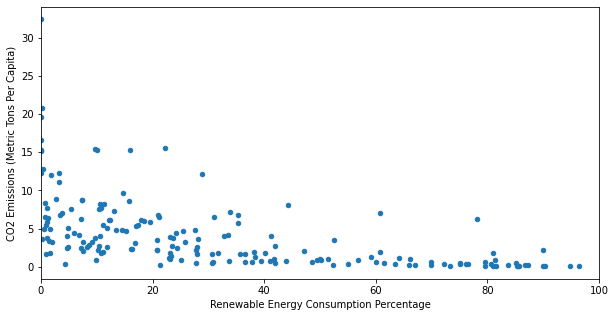

In [75]:
data2018.plot.scatter(x='Renewable Energy Consumption Percentage', y='CO2 Emissions (Metric Tons Per Capita)', figsize=(10,5), xlim=(0 ,100))

We can see a general trend in the fact that countries with lower renewable energy consumption percentage had higher CO2 emissions per capita. However this trend seems to be ineffictibe at renewable energy consumption percentages above 40%.

Finally, lets look at the correlation value between the 2 for the year 2018.

In [76]:
data2018['Renewable Energy Consumption Percentage'].corr(data2018['CO2 Emissions (Metric Tons Per Capita)'])

-0.5423796078116238

# Conculsion

As per the analysis above, we can see that there is some truth to the hypothesis made in the question section. The hypothesis figured that as renewable enrgy consumption lowered, the CO2 emissions would be higher. From the analysis we can see that the data shows a correlation coefficent of about -0.5. While this isn't negative one like the hypothesis predicted, it is still somewhat related.

Furthermore, visualizing the data for 2018 helps to understand the trend in the data a little bit better. From the scatterplot figure above, one can see that the countries with the highest CO2 emissions per capita, had the lowest renewable enrgy consumption. However, as renewable energy consumption increased, the trend discontinued at around 40% renewable enrgy consumption. This may indicate that there is a threshold at which the renewable energy consumption gives diminishing returns in terms of reducing CO2 emissions.

Limitiations and errors may have occured with this data analyzation as there were several factors that could lead to different results. First and foremost, if raw CO2 emissions in metric tons were used instead of CO2 emissions per capita, we could have seen a different trend in the data. This could be a potential update to this analysis. A limitation to this analysis was the fact that only one year was used to evaluate, but there was a choice of 28 years. Although it might complicate and elongate the evaluation, one could review the trends for every year and come up with an average trend.